
📊 Evaluation for Logistic Regression
Confusion Matrix:
[[ 0 14]
 [ 0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.30      1.00      0.46         6

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20


📊 Evaluation for Random Forest
Confusion Matrix:
[[5 9]
 [2 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.36      0.48        14
           1       0.31      0.67      0.42         6

    accuracy                           0.45        20
   macro avg       0.51      0.51      0.45        20
weighted avg       0.59      0.45      0.46        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


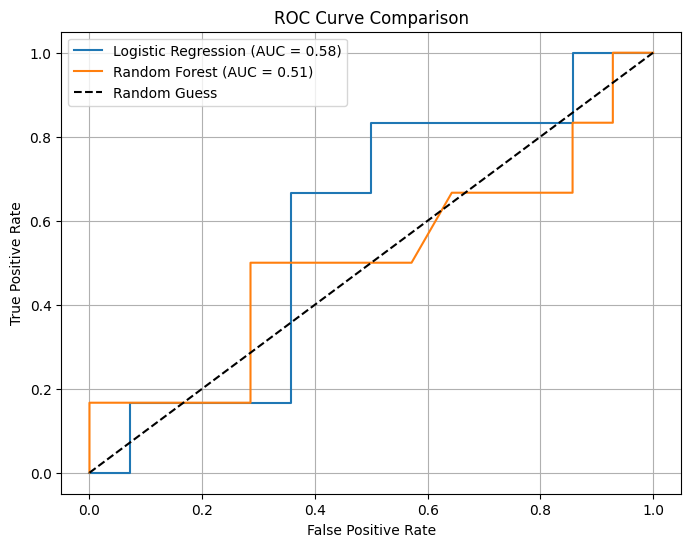

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Simulate a sample dataset
# In real use, replace this with: pd.read_csv("your_dataset.csv")
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(21, 60, 100),
    'Income': np.random.randint(20000, 150000, 100),
    'Education': np.random.choice(['Graduate', 'Not Graduate'], 100),
    'Credit_Score': np.random.randint(300, 850, 100),
    'Married': np.random.choice(['Yes', 'No'], 100),
    'Loan_Status': np.random.choice(['Approved', 'Rejected'], 100)
})

# Step 3: Preprocessing
# Encode categorical variables
label_enc = LabelEncoder()
data['Education'] = label_enc.fit_transform(data['Education'])  # Graduate:1, Not Graduate:0
data['Married'] = label_enc.fit_transform(data['Married'])      # Yes:1, No:0
data['Loan_Status'] = label_enc.fit_transform(data['Loan_Status'])  # Approved:1, Rejected:0

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
data[['Age', 'Income', 'Credit_Score']] = imputer.fit_transform(data[['Age', 'Income', 'Credit_Score']])

# Step 4: Split data
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train models
log_model = LogisticRegression()
rf_model = RandomForestClassifier()

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Step 6: Evaluate
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n📊 Evaluation for {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Step 7: Plot ROC
plt.figure(figsize=(8,6))
evaluate_model(log_model, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()